In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Downloading the dataset

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg" -O netflix_ds.csv

--2024-12-10 13:07:56--  https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg
Resolving drive.google.com (drive.google.com)... 142.251.31.113, 142.251.31.139, 142.251.31.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.31.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg&export=download [following]
--2024-12-10 13:07:56--  https://drive.usercontent.google.com/download?id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.69.132, 2a00:1450:4013:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [application/octet-stream]
Saving to: ‘netflix_ds.csv’

netflix_ds.csv      100%[===================>]   3.24M  --.-KB/s

# Uploading the dataset

In [ ]:
# Loading the dataset

df = pd.read_csv('netflix_ds.csv')


In [ ]:
# Exploring the dataset by viewing first five rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Overview of the data

In [ ]:
# Getting info about the shape of datase

df.shape


(8807, 12)

In [ ]:
df.info()
# The info shows the data type of each column and also ensures the number of null values present in the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Checking presence of total number of null values in the dataset

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# Summary:


1.   The *df* dataset has 8807 rows and 12 columns
2.   The *df* dataset has 11 columns are of string datatype and only one column i.e of int64 data type.
3.   There are presence of null value *director* column has maximum null values followed by *country, cast, date_added,* *rating* and *release_year*
4.   We also have to change the date_added column data_type from string to dateTime data type





# Data Cleaning and Analysis


*   Checking and Removing Duplicates if required
*   Replacing null value with column_name and any missing numerical value with 0
*   We'll also copy and store this new columns with some of the columns into a new dataset named df1. So that we without making any changes in our df dataset will work with only the updated one.
*   Changing the data type of date_added column from string to dateTime data type




In [ ]:
# Checking duplicates

df.duplicated().sum()

0

In [ ]:
# Replacing null value with column_name and any missing numerical value with 0

df['director_filled'] = df['director'].fillna('unknown_director')
df['cast_filled'] = df['cast'].fillna('unknown_cast')
df['country_filled'] = df['country'].fillna('unknown_country')
df['date_time'] = df['date_added'].fillna(0)
df['rating_filled'] = df['rating'].fillna('unknown_rating')
df['duration_filled'] = df['duration'].fillna('unknown_duration')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          8807 non-null   object
 1   type             8807 non-null   object
 2   title            8807 non-null   object
 3   director         6173 non-null   object
 4   cast             7982 non-null   object
 5   country          7976 non-null   object
 6   date_added       8797 non-null   object
 7   release_year     8807 non-null   int64 
 8   rating           8803 non-null   object
 9   duration         8804 non-null   object
 10  listed_in        8807 non-null   object
 11  description      8807 non-null   object
 12  director_filled  8807 non-null   object
 13  cast_filled      8807 non-null   object
 14  country_filled   8807 non-null   object
 15  date_time        8807 non-null   object
 16  rating_filled    8807 non-null   object
 17  duration_filled  8807 non-null   

In [ ]:
# Copying updated columns

columns_to_copy = ['show_id', 'type', 'title', 'director_filled',
                   'cast_filled', 'country_filled', 'date_time', 'release_year',
                   'rating_filled', 'duration_filled', 'listed_in', 'description']

df1 = df[columns_to_copy]

In [ ]:
# Overviewing updated dataset df1
df1.head()

,show_id,type,title,director_filled,cast_filled,country_filled,date_time,release_year,rating_filled,duration_filled,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_cast,unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Getting info about the new df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          8807 non-null   object
 1   type             8807 non-null   object
 2   title            8807 non-null   object
 3   director_filled  8807 non-null   object
 4   cast_filled      8807 non-null   object
 5   country_filled   8807 non-null   object
 6   date_time        8807 non-null   object
 7   release_year     8807 non-null   int64 
 8   rating_filled    8807 non-null   object
 9   duration_filled  8807 non-null   object
 10  listed_in        8807 non-null   object
 11  description      8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Changing the data type of date_time column from object class to dateTime

df1['date_time'] = pd.to_datetime(df1['date_time'], errors='coerce')
df1['date_time'] = df1['date_time'].fillna(pd.Timestamp('1900-01-01'))
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director_filled  8807 non-null   object        
 4   cast_filled      8807 non-null   object        
 5   country_filled   8807 non-null   object        
 6   date_time        8807 non-null   datetime64[ns]
 7   release_year     8807 non-null   int64         
 8   rating_filled    8807 non-null   object        
 9   duration_filled  8807 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


<ipython-input-87-5c1bfcf3911b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_time'] = pd.to_datetime(df1['date_time'], errors='coerce')
<ipython-input-87-5c1bfcf3911b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_time'] = df1['date_time'].fillna(pd.Timestamp('1900-01-01'))


,show_id,type,title,director_filled,cast_filled,country_filled,date_time,release_year,rating_filled,duration_filled,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_cast,unknown_country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Summary:

*   There are no duplicate values present in the dataset
*   We have replaced null values with their respective column names
*   We've updated these columns in a new dataset named df1 and will do our complete analysis on this dataset only without impacting the old one
*   We've converted date_time column data type from object data type to dateTime data type





# Unnesting the columns
Since while looking at the dataset it has been observed that there are multiple values present in the columns like director, cast etc

In [ ]:
df1.head()

,show_id,type,title,director_filled,cast_filled,country_filled,date_time,release_year,rating_filled,duration_filled,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown_country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown_director,unknown_cast,unknown_country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Unnesting Director
director_df = df1[['show_id', 'type', 'title', 'director_filled', 'date_time', 'release_year', 'rating_filled', 'duration_filled','description']]
director_df['unnested_director'] = df1['director_filled'].str.split(', ')
director_df = director_df.explode('unnested_director')
director_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9612 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            9612 non-null   object        
 1   type               9612 non-null   object        
 2   title              9612 non-null   object        
 3   director_filled    9612 non-null   object        
 4   date_time          9612 non-null   datetime64[ns]
 5   release_year       9612 non-null   int64         
 6   rating_filled      9612 non-null   object        
 7   duration_filled    9612 non-null   object        
 8   description        9612 non-null   object        
 9   unnested_director  9612 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 826.0+ KB


<ipython-input-89-fa7be3289ae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_df['unnested_director'] = df1['director_filled'].str.split(', ')


Graphical analysis of director

In [ ]:
# Unnesting Cast
cast_df = df1[['show_id', 'type', 'title', 'cast_filled', 'date_time', 'release_year', 'rating_filled', 'duration_filled','description']]
cast_df['unnested_cast'] = df1['cast_filled'].str.split(', ')
cast_df = cast_df.explode('unnested_cast')
cast_df.info()

<ipython-input-90-e67a0b2a581c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_df['unnested_cast'] = df1['cast_filled'].str.split(', ')


<class 'pandas.core.frame.DataFrame'>
Index: 64951 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          64951 non-null  object        
 1   type             64951 non-null  object        
 2   title            64951 non-null  object        
 3   cast_filled      64951 non-null  object        
 4   date_time        64951 non-null  datetime64[ns]
 5   release_year     64951 non-null  int64         
 6   rating_filled    64951 non-null  object        
 7   duration_filled  64951 non-null  object        
 8   description      64951 non-null  object        
 9   unnested_cast    64951 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 5.5+ MB


Non Graphical and Graphical analysis of cast_df value counts for the unnested coulumns

Graphical Analysis

Director Counts Analysis:


*   Netflix generally has content available from many unknown directors.
*   Among known directors, Rajiv Chilaka (with 22 titles) and Jan Sutar (with 21 titles) have produced more content than any others.
*   It can be assumed that viewers enjoy watching movies or TV shows directed by them.









In [ ]:
# Unnesting country
country_df = df1[['show_id', 'type', 'title', 'country_filled', 'date_time', 'release_year', 'rating_filled', 'duration_filled','description']]
country_df['unnested_country'] = df1['country_filled'].str.split(', ')
country_df = country_df.explode('unnested_country')

country_df.head()

<ipython-input-91-e3f3fbfd43c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['unnested_country'] = df1['country_filled'].str.split(', ')


,show_id,type,title,country_filled,date_time,release_year,rating_filled,duration_filled,description,unnested_country
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,unknown_country,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,unknown_country
3,s4,TV Show,Jailbirds New Orleans,unknown_country,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",unknown_country
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,India


In [ ]:
# Unnesting listed_in

listed_in_df = df1[['show_id', 'type', 'title', 'date_time', 'release_year', 'rating_filled', 'duration_filled', 'listed_in', 'description']]
listed_in_df['unnested_listed_in'] = df1['listed_in'].str.split(', ')
listed_in_df = listed_in_df.explode('unnested_listed_in')

listed_in_df.info()

<ipython-input-92-70f415250585>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_in_df['unnested_listed_in'] = df1['listed_in'].str.split(', ')


<class 'pandas.core.frame.DataFrame'>
Index: 19323 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             19323 non-null  object        
 1   type                19323 non-null  object        
 2   title               19323 non-null  object        
 3   date_time           19323 non-null  datetime64[ns]
 4   release_year        19323 non-null  int64         
 5   rating_filled       19323 non-null  object        
 6   duration_filled     19323 non-null  object        
 7   listed_in           19323 non-null  object        
 8   description         19323 non-null  object        
 9   unnested_listed_in  19323 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.6+ MB


In [ ]:
merged_df = director_df.merge(cast_df[['show_id', 'unnested_cast']], on = 'show_id', how = 'left') \
.merge(country_df[['show_id', 'unnested_country']], on = 'show_id', how = 'left') \
.merge(listed_in_df[['show_id', 'unnested_listed_in']], on = 'show_id', how = 'left')

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   show_id             201991 non-null  object        
 1   type                201991 non-null  object        
 2   title               201991 non-null  object        
 3   director_filled     201991 non-null  object        
 4   date_time           201991 non-null  datetime64[ns]
 5   release_year        201991 non-null  int64         
 6   rating_filled       201991 non-null  object        
 7   duration_filled     201991 non-null  object        
 8   description         201991 non-null  object        
 9   unnested_director   201991 non-null  object        
 10  unnested_cast       201991 non-null  object        
 11  unnested_country    201991 non-null  object        
 12  unnested_listed_in  201991 non-null  object        
dtypes: datetime64[ns](1), int64(1

In [ ]:
df2 = merged_df[['show_id', 'type', 'title', 'unnested_director', 'unnested_cast',
             'unnested_country', 'date_time', 'release_year', 'rating_filled',
             'duration_filled', 'unnested_listed_in', 'description']]


In [ ]:
# shape of new data set df2

df2.shape

(201991, 12)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   show_id             201991 non-null  object        
 1   type                201991 non-null  object        
 2   title               201991 non-null  object        
 3   unnested_director   201991 non-null  object        
 4   unnested_cast       201991 non-null  object        
 5   unnested_country    201991 non-null  object        
 6   date_time           201991 non-null  datetime64[ns]
 7   release_year        201991 non-null  int64         
 8   rating_filled       201991 non-null  object        
 9   duration_filled     201991 non-null  object        
 10  unnested_listed_in  201991 non-null  object        
 11  description         201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


# Summary:


*   The new data set named *df2* has a 201991 rows and 12 columns
*   The new data set is has no null values date_time converted from string type to dateTime datatype
*   Contains unnested columns





In [ ]:
df2.head(10)

,show_id,type,title,unnested_director,unnested_cast,unnested_country,date_time,release_year,rating_filled,duration_filled,unnested_listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,unknown_director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
6,s2,TV Show,Blood & Water,unknown_director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
7,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
8,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
9,s2,TV Show,Blood & Water,unknown_director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."


# Categorical Variable Counts
We'll use *df1* dataset

In [ ]:
# Value counts of type
print('Type Value counts: ', df1['type'].value_counts())

Type Value counts:  type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Insights of type value counts:
*   Netflix offers a total of 6,131 movies and 2,676 TV shows. The higher number of movies suggests that viewers may prefer movies over TV shows. This preference could be attributed to the difference in duration; movies have a fixed length, while TV shows have seasons, potentially leading to less viewer engagement.

In [ ]:
# Value count of countries
print('Country Value Counts: ', df1['country_filled'].value_counts().head(10))

Country Value Counts:  country_filled
United States      2818
India               972
unknown_country     831
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64


Insights of countries:

*   Among countries most number of movies or tv shows released are in United States- 2818 followed by India-972. This shows that viewers of this countries often watch Netflix.

In [ ]:
print('Rating Value Counts: ', df1['rating_filled'].value_counts().head(10))

Rating Value Counts:  rating_filled
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64



*   Netflix has uploaded more content under 'TV-MA' rating which indicates that the viewers under the age of 17 can't watch this type of content as this type of content has intense violence, graphical sexual content and strong languages.
*   This can be one of the big reasons the less number of viewers using netflix as it focuses on targetting more to the viewers above the age of 17.




# Movies vs TV Shows by Country
Non-Graphical Analysis

In [ ]:
movies = country_df[df['type'] == 'Movie'].groupby('unnested_country')['title'].nunique().sort_values(ascending = False).head(10)
tv_shows = country_df[df['type'] == 'TV Show'].groupby('unnested_country')['title'].nunique().sort_values(ascending = False).head(10)
print('Movies: ', movies)
print('TV Show: ', tv_shows)

Movies:  unnested_country
United States      2751
India               962
United Kingdom      532
unknown_country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64
TV Show:  unnested_country
United States      938
unknown_country    391
United Kingdom     272
Japan              199
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: title, dtype: int64


<ipython-input-101-38cc9fceb043>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies = country_df[df['type'] == 'Movie'].groupby('unnested_country')['title'].nunique().sort_values(ascending = False).head(10)
<ipython-input-101-38cc9fceb043>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_shows = country_df[df['type'] == 'TV Show'].groupby('unnested_country')['title'].nunique().sort_values(ascending = False).head(10)


Graphical Analysis for the top 10 countries producing movies

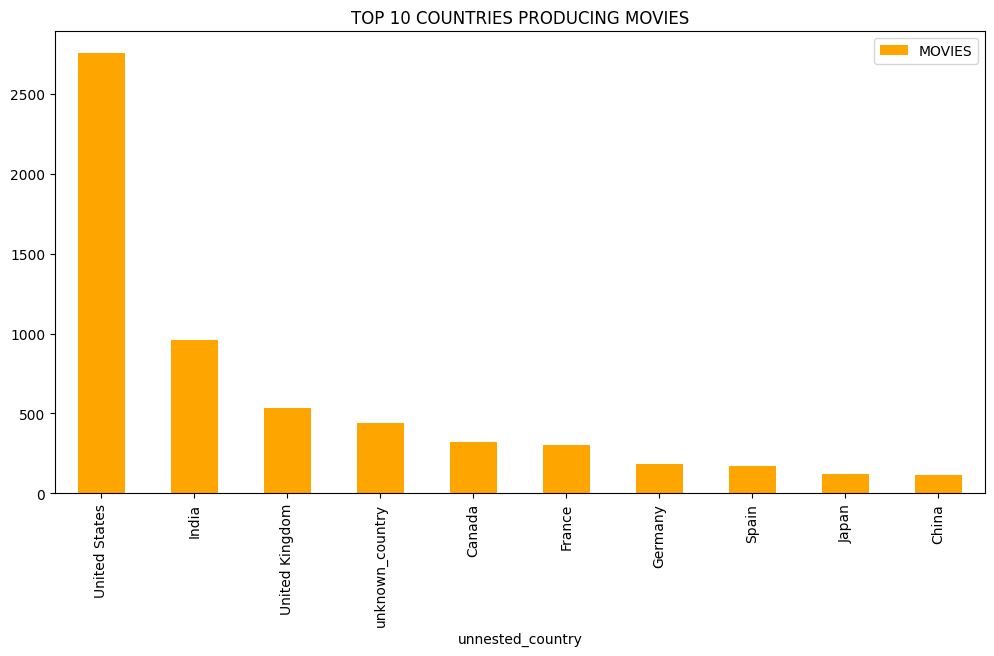

In [ ]:
plt.figure(figsize = (12, 6))
movies.plot(kind = 'bar', color = 'orange', label = 'MOVIES')
plt.title('TOP 10 COUNTRIES PRODUCING MOVIES')
plt.legend()
plt.show()

Summary:
*   Both non-graphical and graphical analyses indicate that the United States has produced the most movies (2,751), followed by India.

*   Viewers appear to enjoy movies produced in the United States and India.

*   The lower movie production numbers from Japan (119) and China (114) may suggest a lower viewer interest in content from these countries. However, other factors could also be at play.

Graphical analysis of the countries producing tv shows

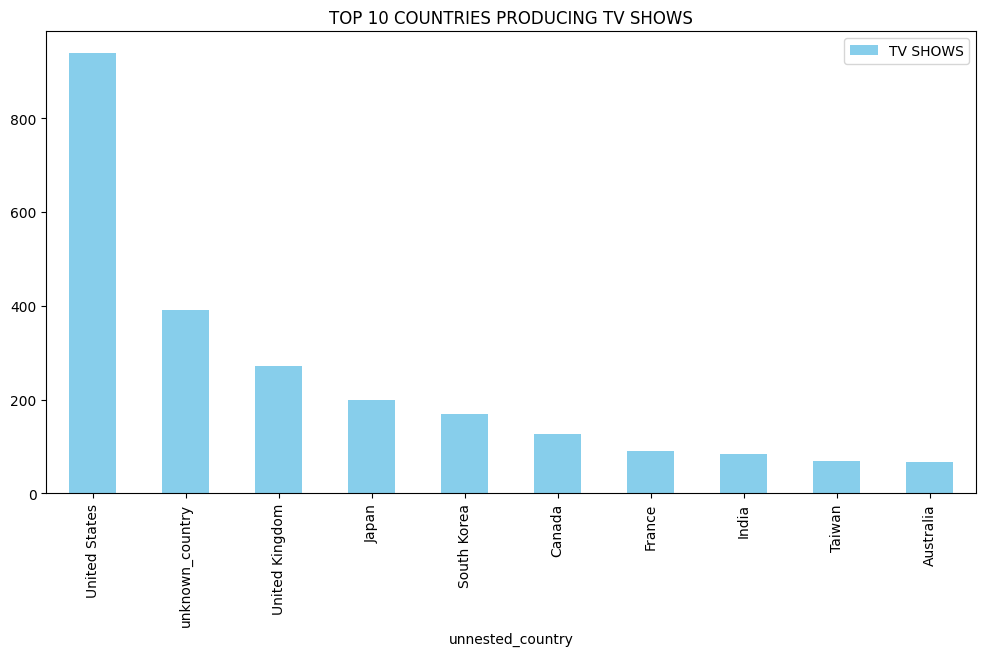

In [ ]:
plt.figure(figsize = (12, 6))
tv_shows.plot(kind = 'bar', color = 'skyblue', label = 'TV SHOWS')
plt.title('TOP 10 COUNTRIES PRODUCING TV SHOWS')
plt.legend()
plt.show()

Insights and Potential Actions for Netflix

1.  USA:
    *   Insight: Viewers in the USA are the largest audience for Netflix content (938), reaffirming their importance as a key market.
    *   Potential Action: Continue to invest in diverse, high-quality content that caters to American tastes and preferences to maintain market dominance.
2.  United Kingdom:
    *   Insight: UK viewers show a strong preference for TV shows, ranking second after the USA with 272 titles.
    *   Potential Action: Focus on producing and acquiring more TV shows that resonate with UK viewers to further capture this market segment.
3.  Japan:
    *   Insight: Japanese viewers are among the top 5 for TV show viewership, indicating a higher preference for TV shows over movies in this market.
    *   Potential Action: Analyze the genres and content themes of popular TV shows in Japan. Leverage this data to create original movies or acquire films that align with these preferences, potentially converting some TV show viewers to movie watchers.
4.  India:
    *   Insight: Indian viewers tend to favor movies over TV shows, with a lower engagement in the TV show category.
    *   Potential Action: While continuing to offer a variety of content, focus on strategies to promote movie consumption in India. This could involve personalized recommendations, exclusive movie premieres, or collaborations with local filmmakers.



# Best Time To Release TV Show and Movies

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   show_id             201991 non-null  object        
 1   type                201991 non-null  object        
 2   title               201991 non-null  object        
 3   unnested_director   201991 non-null  object        
 4   unnested_cast       201991 non-null  object        
 5   unnested_country    201991 non-null  object        
 6   date_time           201991 non-null  datetime64[ns]
 7   release_year        201991 non-null  int64         
 8   rating_filled       201991 non-null  object        
 9   duration_filled     201991 non-null  object        
 10  unnested_listed_in  201991 non-null  object        
 11  description         201991 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [ ]:
# First let's get name of the week and month and store them in a new column named Week and Month
df2['Week'] = df2['date_time'].dt.day_name()
df2['Month'] = df2['date_time'].dt.month_name()

In [ ]:
# Separate analysis for movies and tv shows
movies = df2[df2['type'] == 'Movie']
tv_shows = df2[df2['type'] == 'TV Show']

In [ ]:
movie_week_counts = movies.groupby('Week')['title'].nunique().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print('Movie Counts: ', movie_week_counts)

Movie Counts:  Week
Monday        628
Tuesday       852
Wednesday     906
Thursday     1053
Friday       1566
Saturday      557
Sunday        569
Name: title, dtype: int64


Best Week Day To Release Movie in NETFLIX

<ipython-input-108-81714b6c341b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = movie_week_counts.index, y = movie_week_counts.values, palette = 'cool')


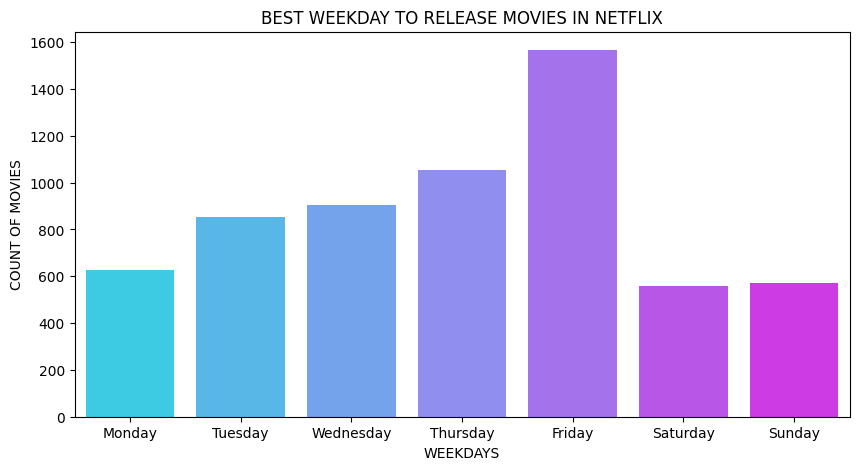

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(x = movie_week_counts.index, y = movie_week_counts.values, palette = 'cool')
plt.title('BEST WEEKDAY TO RELEASE MOVIES IN NETFLIX')
plt.xlabel('WEEKDAYS')
plt.ylabel('COUNT OF MOVIES')
plt.show()

In [ ]:
tv_show_week_counts = tv_shows.groupby('Week')['title'].nunique().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print('TV Show Counts: ', tv_show_week_counts)


TV Show Counts:  Week
Monday       315
Tuesday      330
Wednesday    370
Thursday     334
Friday       910
Saturday     246
Sunday       171
Name: title, dtype: int64


Best Week Day To Release TV Show in NETFLIX

<ipython-input-110-76a898d6f2ad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tv_show_week_counts.index, y = tv_show_week_counts.values, palette = 'cool')


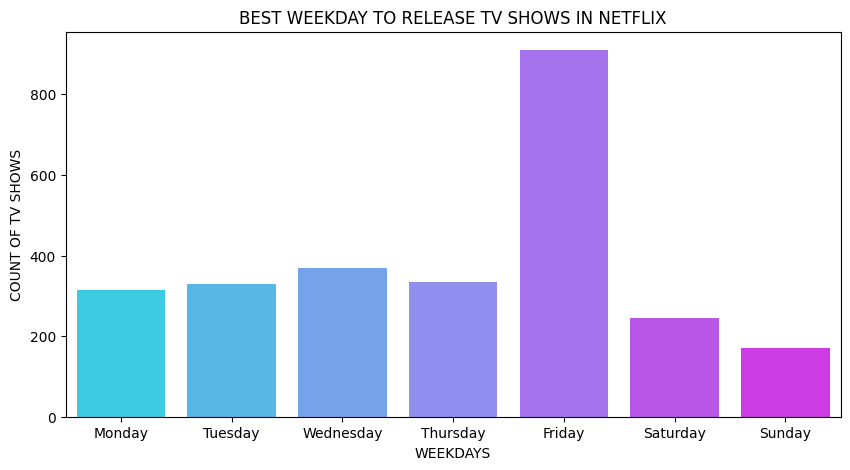

In [ ]:
plt.figure(figsize = (10, 5))
sns.barplot(x = tv_show_week_counts.index, y = tv_show_week_counts.values, palette = 'cool')
plt.title('BEST WEEKDAY TO RELEASE TV SHOWS IN NETFLIX')
plt.xlabel('WEEKDAYS')
plt.ylabel('COUNT OF TV SHOWS')
plt.show()

Analysis:
In both cases, the maximum number of movies and TV shows are released on Fridays. This is likely because Friday is the last working day for many, and viewers enjoy watching movies or TV shows with their family and friends on this day. Therefore, the best time to release movies and TV shows during any week is Friday.

Best month to release movie in NETFLIX

In [ ]:
movie_month_counts = movies.groupby('Month')['title'].nunique().reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                                                         'July', 'August', 'September', 'October', 'November', 'December']).sort_values(ascending = False)
print('Movie Counts: ', movie_month_counts)

Movie Counts:  Month
July         565
April        550
December     547
January      546
October      545
March        529
August       519
September    519
November     498
June         492
May          439
February     382
Name: title, dtype: int64


Graphical Analysis

<ipython-input-112-6a21a192fbcc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = movie_month_counts.index, y = movie_month_counts.values, palette = 'cool')


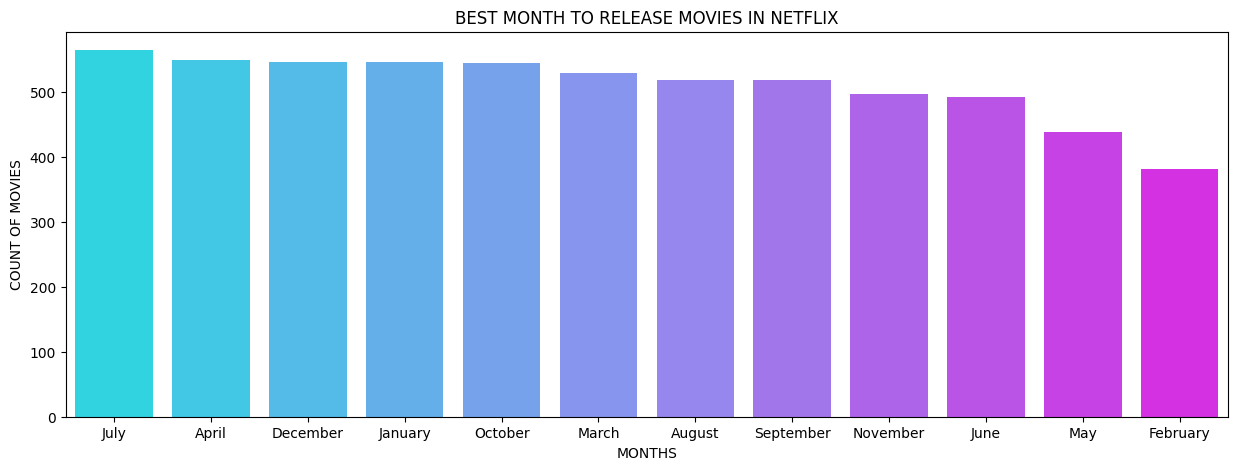

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(x = movie_month_counts.index, y = movie_month_counts.values, palette = 'cool')
plt.title('BEST MONTH TO RELEASE MOVIES IN NETFLIX')
plt.xlabel('MONTHS')
plt.ylabel('COUNT OF MOVIES')
plt.show()

Best Month to Release TV Show

In [ ]:
tv_show_month_counts = tv_shows.groupby('Month')['title'].nunique().reindex(['January', 'February', 'March', 'April', 'May', 'June',
                                                                         'July', 'August', 'September', 'October', 'November', 'December']).sort_values(ascending = False)
print('TV Show Counts: ', tv_show_month_counts)

TV Show Counts:  Month
January      279
July         254
December     250
September    246
June         232
August       230
October      210
April        209
March        205
November     199
May          187
February     175
Name: title, dtype: int64


Graphical Analysis

<ipython-input-114-1ab2e46b89c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tv_show_month_counts.index, y =tv_show_month_counts.values, palette = 'cool')


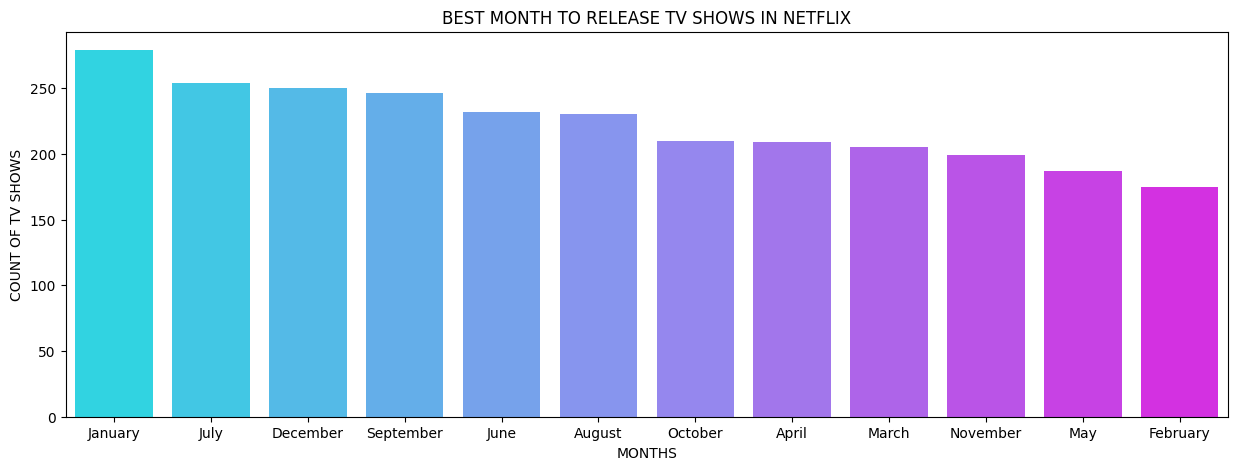

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(x = tv_show_month_counts.index, y =tv_show_month_counts.values, palette = 'cool')
plt.title('BEST MONTH TO RELEASE TV SHOWS IN NETFLIX')
plt.xlabel('MONTHS')
plt.ylabel('COUNT OF TV SHOWS')
plt.grid
plt.show()

Movie Release Analysis:

Insights:

*     July emerges as the most favorable month for    movie releases on Netflix, followed by April, December, January, and October.

*     Factors for July: The analysis highlights July's popularity due to factors such as holiday periods and students finishing their exams in densely populated countries like India. This leads to increased viewership and family-time film consumption.

TV Show Release Analysis:

Insights:

January is identified as the optimal month to release TV shows. This aligns with global trends of viewership spikes during winter and reduced movie production during the awards season, allowing TV shows to gain more attention.

# Top Directors and Actors

Non-Graphical and Graphical analysis for Top 10 Actors

In [ ]:
top_10_actors = df2.groupby('unnested_cast')['title'].nunique().sort_values(ascending = False).head(10)
print('Top 10 Actors: ', top_10_actors)

Top 10 Actors:  unnested_cast
unknown_cast        825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: title, dtype: int64


Graphical Analysis for Top 10 Actors:

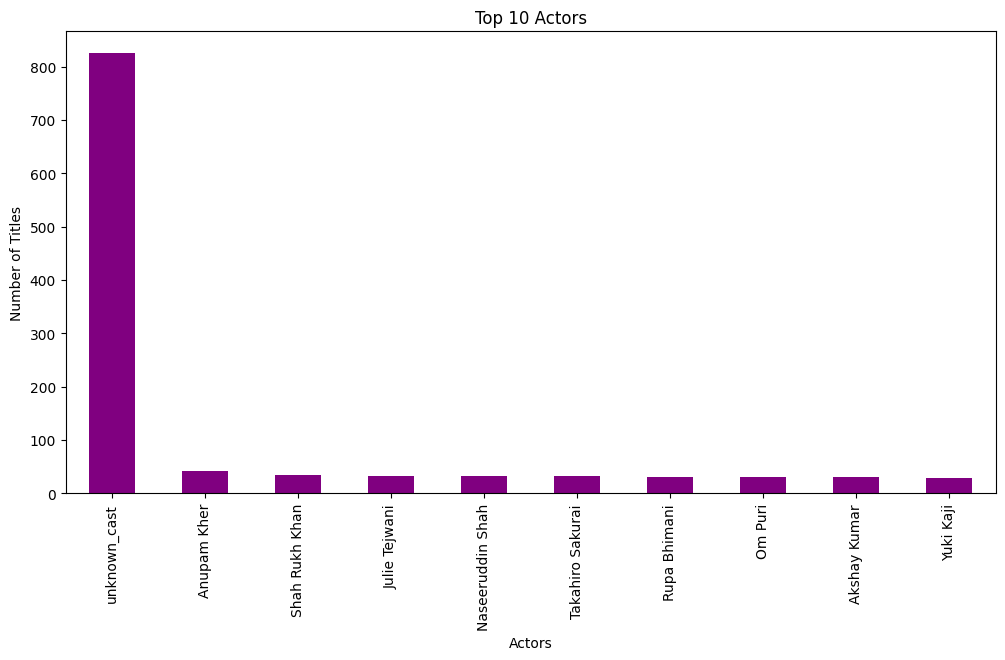

In [ ]:
top_10_actors.plot(kind = 'bar', figsize = (12, 6), color = 'purple', title = 'Top 10 Actors')
plt.xlabel('Actors')
plt.ylabel('Number of Titles')
plt.show()

Top 10 Actors Analysis:

*     Netflix features many actors who are unfamiliar to viewers. This could result in lower audience engagement and reduced popularity for the cast.

*     Anupam Kher has appeared in more Netflix content than Shahrukh Khan. This suggests viewers appreciate their work due to their acting abilities.

*     To expand its business, Netflix should consider featuring more well-known actors. This could lead to increased viewership and greater popularity for both the platform and the cast.

Non-Graphical and Graphical Analysis for the Top 10 Directors

In [ ]:
top_10_directors = df2.groupby('unnested_director')['title'].nunique().sort_values(ascending = False).head(10)
print('Top 10 Directors: ', top_10_directors)

Top 10 Directors:  unnested_director
unknown_director       2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Youssef Chahine          12
Name: title, dtype: int64


Graphical Analysis for Top 10 Directors:

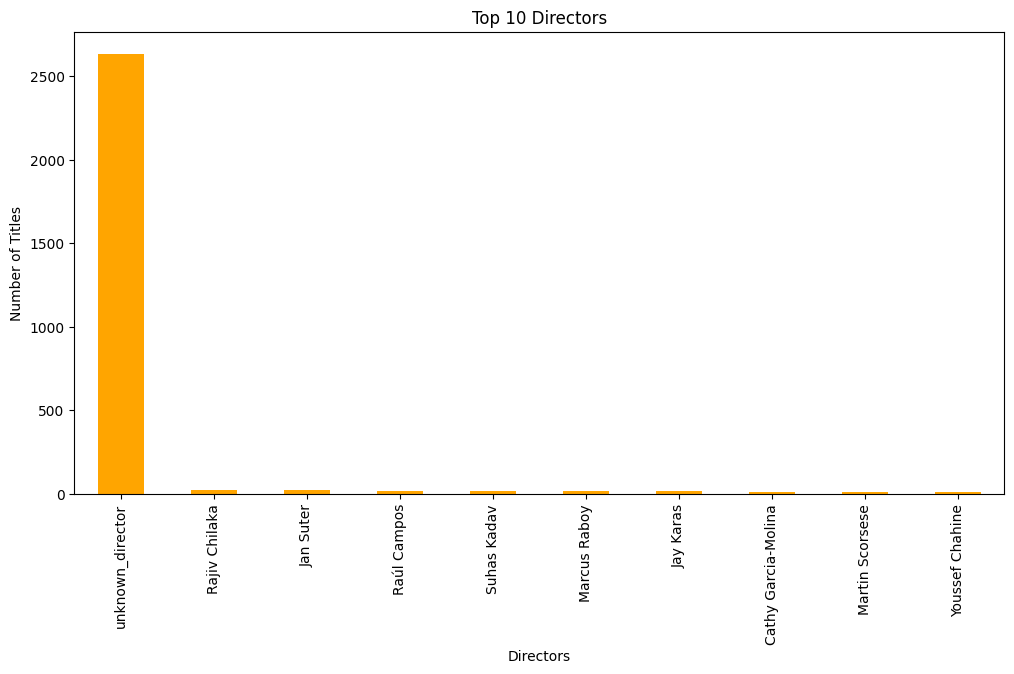

In [ ]:
top_10_directors.plot(kind = 'bar', figsize =(12, 6), color = 'orange', title = 'Top 10 Directors')
plt.xlabel('Directors')
plt.ylabel('Number of Titles')
plt.show()

Top 10 Director Analysis:

*     Netflix generally has content available from many unknown directors.
*     Among known directors, Rajiv Chilaka (with 22 titles) and Jan Sutar (with 21 titles) have produced more content than any others.
*     It can be assumed that viewers enjoy watching movies or TV shows directed by them.

# Most Popular Genre Movies

In [ ]:
genre_counts = df2.groupby('unnested_listed_in')['title'].nunique().sort_values(ascending = False).head(10)
genre_counts

,title
unnested_listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641


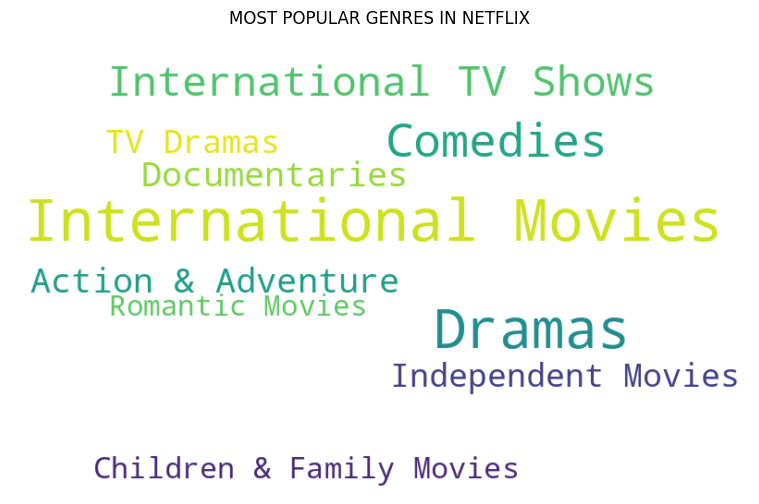

In [ ]:
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white').generate_from_frequencies(genre_counts.to_dict())
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('MOST POPULAR GENRES IN NETFLIX')
plt.show()


Most Popular Genre in NETFLIX:

*     The most popular genre in NETFLIX is International Movies followed by dramas.

*     This analysis shows that viewers often love watching international movies and dramas over any other genres

*     Increase in producing more International Movies and Dramas may result in generating a good revenue for NETFLIX



# Time to Add Movies

In [ ]:
df2['Year_Diff'] = df2['date_time'].dt.year - df2['release_year']

mode_diff = df2['Year_Diff'].mode()[0]
print(f"The most common difference between release year and addition to Netflix is {mode_diff} years")

The most common difference between release year and addition to Netflix is 0 years
